In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots

In [3]:
include("../../src/NanoOpt.jl")

KsspSlab (generic function with 1 method)

In [4]:
mat1 = material(1.0^2,1.0)
matSc = material(epstable("gold"),1.0)
mat2 = material(1.452^2,1.0);

In [5]:
matScatter = [mat1; matSc];

In [6]:
layer = layerstructure([mat1,mat2],[0.0,],"up");

In [7]:
w,d = 150.,17.
rc = 2.
Nc,Nw,Nd = 3,20,5
xC = (0.,d/2. +0.);

In [8]:
rod = Rod(w,d,rc,Nc,Nw,Nd,xC);

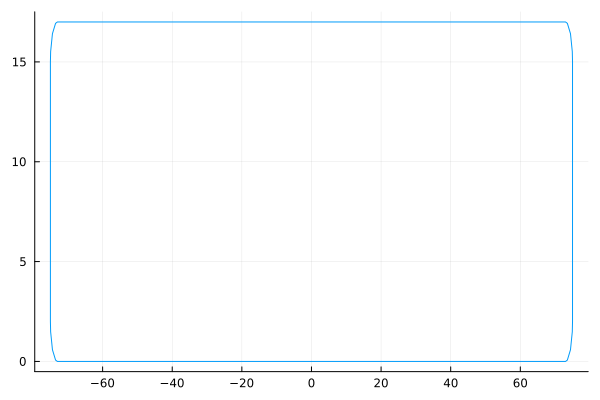

In [9]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [10]:
xm = (maximum(X)-minimum(X))+1;

In [11]:
yp = 2maximum(Y)+2
ym = 2minimum(Y);

In [12]:
yp

36.0

In [13]:
dThr = 50.
m = 2

2

In [14]:
i = 1

k0 = 2π/740
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = 90.

90.0

In [15]:
SParms = SommerfieldParams(layer,3k0);

In [16]:
@time Grf = GreenFunctions(matScatter,"layer";xP= (xm , 12), yP = (ym,yp,12), SParms = SParms);

 83.896588 seconds (89.91 M allocations: 3.861 GiB, 3.60% gc time, 36.81% compilation time)


In [17]:
@time H,ϕ = getHϕ(m,rod,k0,Grf,matSc.n,mat1.n,dThr,α,layer,"layer");

 81.979610 seconds (169.34 M allocations: 6.642 GiB, 6.12% gc time, 53.09% compilation time)


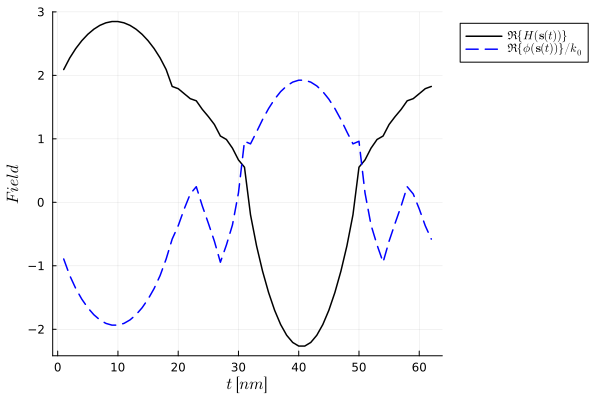

In [18]:
gr()
plot(real.(H[:,3]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,3])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:outertopright)

# ========================================

In [19]:
Rf = 1000
θA  = 0.1:0.01:π
θAn  = -0.1:-0.001:-π

-0.1:-0.001:-3.141

In [20]:
HsV = [getHₛ(θA[i],Rf,ϕ,H,k0,m,rod,layer) for i in eachindex(θA)];

In [21]:
HsVn = [getHₛ(θAn[i],Rf,ϕ,H,k0,m,rod,layer) for i in eachindex(θAn)];

In [22]:
c = layer.mat[end].n(k0)/layer.mat[1].n(k0);

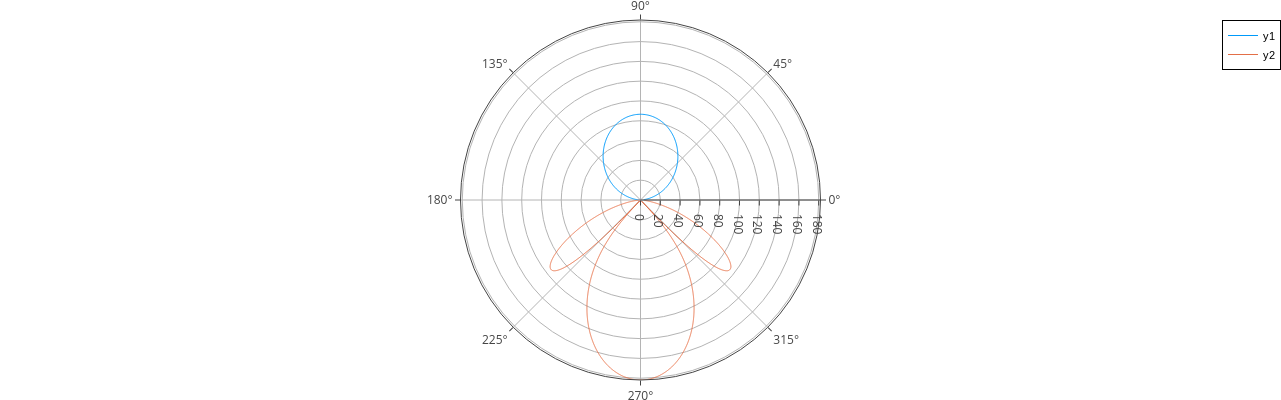

In [23]:
plotly()
plot( θA,abs.(HsV).^2 .*Rf,proj=:polar)
plot!( θAn,c*abs.(HsVn).^2 .*Rf,proj=:polar)

In [24]:
λArr = 500:20:900;
kArr = 2π./λArr;

In [25]:
σOUPu = getσOUP(m,kArr,Rf,matScatter,rod,dThr,α,layer,"up");

In [26]:
σOUPd = getσOUP(m,kArr,Rf,matScatter,rod,dThr,α,layer,"down");

In [27]:
σₐArr = getσₐ(m,kArr,matScatter,rod,dThr,α,"layer"; layer = layer,xP= (xm , 12), yP = (ym,yp,12));

In [28]:
σEXTu,σEXTd = getσEXT(m,kArr,Rf,matScatter,rod,dThr,α,layer);

In [29]:
plot(λArr,σEXTd, label="Ext down",lw=1.2,c=:black,mark=:circle)
plot!(λArr,σEXTu, label="Ext up",lw=1.2,c=:black,mark=:hexagon)
plot!(λArr,σEXTu+σEXTd, label="Ext tot",lw=1.2,c=:black,ls=:dot)
plot!(λArr,σOUPu, label="Scatt. up",lw=1.2,c=:blue,ls=:dashdot,mark=:rect)
plot!(λArr,σOUPd, label="Scatt. down",lw=1.2,c=:blue,ls=:dashdot,mark=:diamond)
plot!(λArr,σₐArr, label="abs",lw=1.2,c=:brown ,ls=:dash)
scatter!(λArr,σₐArr+σOUPd+σOUPu,label="Abs+Scatt",c=:red,mark=:xcross,xlabel="Wavelength [nm]",  ylabel="Optical cross sections [nm]",legend=:outertopright)

In [30]:
plot(λArr,σOUPu./w)
plot!(λArr,σOUPd./w)

In [31]:
plot(@. ((σₐArr+σOUPd+σOUPu)-(σEXTu+σEXTd))/(σEXTu+σEXTd))